In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [13]:
image_path = '/Users/ned/Documents/Projects/DFLCV/output_videos/cropped_img.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

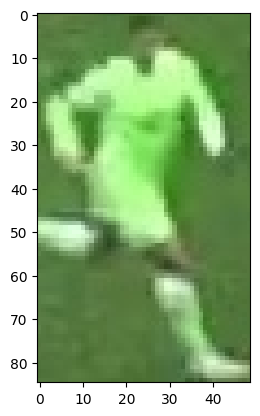

In [14]:
plt.imshow(img)
plt.show()

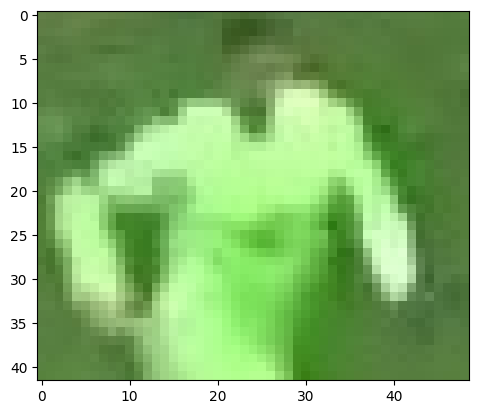

In [15]:
# Take the top half of the image
img_top_half = img[:img.shape[0] // 2, :]

plt.imshow(img_top_half)
plt.show()


# Clustering the image into 2

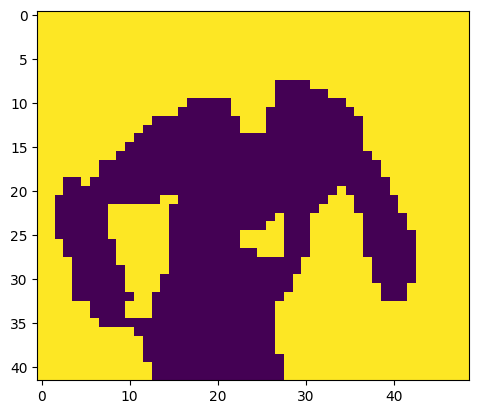

In [19]:
# Reshaping the image
image_2d = img_top_half.reshape(-1, 3)

# Perform k-means with two clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(image_2d)

# Get the cluster labels
labels = kmeans.labels_

# Reshape the labels into the original image
clustered_image = labels.reshape(img_top_half.shape[0], img_top_half.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()


In [27]:
corner_clusters = clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, -1], clustered_image[-1, 0]

non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)

player_cluster = 1-non_player_cluster
print(player_cluster)
print(non_player_cluster)


0
1


In [28]:
kmeans.cluster_centers_[player_cluster]

array([170.25461741, 235.73218997, 142.10290237])